### Tax4fun analysis

JG - 6/5/18 

Main goals are to look at some nitrogen cycling predicted functions since we see some differences already in strongly phylogenetically coupled functions



### Imports & functions

In [465]:
import pandas as pd
import numpy as np
import re
#import json #Ended up not using json because the naming convention for KEGG file was dumb. Wrote a snippet to convert flat html file to pandas dataframe w/4 levels instead.

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Functions
def update_columns(df):
    """Coerces columns to a common format"""
    new_cols = [x.upper().replace('R','') for x in df.columns]
    df.columns = new_cols
    return df

def update_index(df):
    """Coerces index to a common format"""
    new_index = [x.upper().replace('R','') for x in df.index]
    df['new_index'] = new_index
    df.set_index('new_index', inplace=True)
    return df

### Loading data

In [349]:
# Loading json file:
json_file = '/Users/jimbo/Desktop/tax4fun_functional_16s_annotation/ko00002.json'
with open(json_file, encoding = 'utf-8') as data_file:
    data = json.loads( data_file.read() )
    
# tax4fun results:
fun_pred_row_samples = pd.read_csv('/Users/jimbo/Desktop/tax4fun_functional_16s_annotation/tax4fun_results.txt', sep='\t')

# Original biom
biom_df = pd.read_csv('../Seq_data/Updated_files/biom/Full_DADA_table/full_biom_w_tax.txt', sep='\t', index_col='OTU ID')

# Map file:
map_df =pd.read_csv('../Metadata/ibp_metadata_4.17.18.txt', sep='\t', index_col=0) 


# Update index, drop missing samples and transpose data
fun_pred_row_samples.index = biom_df.columns[:-1]
biom_df = update_columns(biom_df)
fun_pred_row_samples = update_index(fun_pred_row_samples)
fun_pred_row_samples = fun_pred_row_samples.loc[map_df.index]
fun_pred = fun_pred_row_samples.transpose()

In [352]:
fun_pred

SampleID,W1.D1.A,W1.D1.B,W1.D10.A,W1.D10.B,W1.D11.A,W1.D12.A,W1.D2.A,W1.D2.B,W1.D3.B,W1.D4.A,...,W9.D4.B,W9.D5.A,W9.D5.B,W9.D6.B,W9.D7.A,W9.D7.B,W9.D8.A,W9.D8.B,W9.D9.A,W9.D9.B
K00001; alcohol dehydrogenase [EC:1.1.1.1],6.326679e-04,5.910387e-04,5.103571e-04,5.344871e-04,4.531688e-04,4.820838e-04,6.287985e-04,5.496003e-04,5.840565e-04,5.797300e-04,...,4.859978e-04,4.481839e-04,4.494824e-04,4.191807e-04,5.440581e-04,5.451205e-04,3.229614e-04,3.458318e-04,3.610624e-04,3.891958e-04
K00002; alcohol dehydrogenase (NADP+) [EC:1.1.1.2],8.528285e-06,9.959964e-06,7.646902e-06,1.001157e-05,1.886700e-05,3.521610e-05,1.015418e-05,1.447183e-05,7.755018e-06,1.002420e-05,...,1.586130e-05,1.495798e-05,1.506482e-05,1.070103e-05,1.248518e-05,1.163039e-05,1.076254e-05,9.008372e-06,1.572496e-05,1.540908e-05
K00003; homoserine dehydrogenase [EC:1.1.1.3],6.031140e-04,6.505026e-04,6.590959e-04,6.603893e-04,6.824940e-04,6.775893e-04,6.594139e-04,6.805041e-04,6.259495e-04,6.298483e-04,...,6.761314e-04,7.344825e-04,7.272848e-04,7.120670e-04,6.185330e-04,6.243195e-04,1.030313e-03,9.388949e-04,8.893492e-04,8.311790e-04
"K00004; (R,R)-butanediol dehydrogenase / diacetyl reductase [EC:1.1.1.4 1.1.1.303]",9.883484e-06,8.795797e-06,4.870682e-06,6.743565e-06,4.278399e-06,6.873411e-06,9.099817e-06,8.109680e-06,7.794714e-06,6.546615e-06,...,8.306421e-06,1.132408e-05,1.178085e-05,8.032771e-06,1.315496e-05,1.206787e-05,2.791997e-06,3.634886e-06,2.995037e-06,3.852576e-06
K00005; glycerol dehydrogenase [EC:1.1.1.6],1.953532e-05,1.667020e-05,1.374548e-05,1.831715e-05,8.566648e-06,2.017651e-05,1.986465e-05,2.214497e-05,1.666971e-05,1.581725e-05,...,8.783056e-06,7.068995e-06,6.647650e-06,9.726811e-06,1.426391e-05,1.490701e-05,6.558122e-06,8.522534e-06,5.654306e-06,6.330981e-06
K00007; D-arabinitol 4-dehydrogenase [EC:1.1.1.11],1.349644e-05,1.146633e-05,1.207388e-05,1.685810e-05,8.803592e-06,1.509956e-05,5.191548e-06,2.949726e-06,6.441604e-06,1.351458e-05,...,8.612285e-06,3.521909e-06,4.578571e-06,1.246520e-06,1.331822e-05,1.368210e-05,5.229853e-07,1.071033e-06,1.619672e-07,7.020364e-07
K00008; L-iditol 2-dehydrogenase [EC:1.1.1.14],2.062181e-04,2.691055e-04,1.868023e-04,2.034147e-04,4.137538e-04,2.886296e-04,3.263060e-04,4.148394e-04,2.279212e-04,2.086477e-04,...,5.423211e-04,6.539173e-04,6.532928e-04,5.792297e-04,3.503825e-04,3.305810e-04,7.664721e-04,6.328927e-04,8.465357e-04,7.899058e-04
K00009; mannitol-1-phosphate 5-dehydrogenase [EC:1.1.1.17],8.068623e-06,6.286275e-06,6.374525e-06,8.393060e-06,5.688414e-06,1.126265e-05,7.275265e-06,4.474965e-06,5.128955e-06,8.241811e-06,...,4.072793e-06,3.499395e-06,2.931437e-06,3.958297e-06,9.518762e-06,9.615962e-06,5.011648e-06,5.304707e-06,6.250295e-06,6.508270e-06
K00010; myo-inositol 2-dehydrogenase [EC:1.1.1.18],2.458641e-04,2.593129e-04,2.252078e-04,2.566498e-04,2.354557e-04,2.120702e-04,2.731775e-04,2.721755e-04,2.378936e-04,2.280548e-04,...,2.642725e-04,2.490963e-04,2.604826e-04,2.780032e-04,2.685513e-04,2.635796e-04,2.349639e-04,2.609842e-04,2.843242e-04,2.967673e-04
K00011; aldehyde reductase [EC:1.1.1.21],1.183980e-05,1.666379e-05,9.323520e-06,1.117689e-05,2.362986e-05,1.538860e-05,2.160257e-05,3.051835e-05,1.553329e-05,1.217004e-05,...,3.419626e-05,3.962474e-05,3.899939e-05,3.729664e-05,2.104112e-05,2.036741e-05,1.754136e-05,1.948143e-05,3.629017e-05,3.689233e-05


### KEGG Hierarchy -> Dataframe

In [398]:
# Converts their HTML output to something organized into 4 levels of modules for easier searching
keg_hier_file = '/Users/jimbo/Desktop/tax4fun_functional_16s_annotation/ko00001.txt'
hier_dict_list = []

with open(keg_hier_file, 'r') as f:
    for line in f:
        if line.startswith('A'):
            line = re.sub('<[^<]+?>', '', line[1:])
            L1 = line.strip()
        
        if line.startswith('B'):
            if len(line) >1:
                L2 = re.sub('<[^<]+?>', '', line[1:]).rstrip()

        if line.startswith('C'):
            L3 = line[1:].split('    ')[-1].rstrip()

        if line.startswith('D'):
            L4 = (line.split('    ')[-1].strip())
            hier_dict = {'L1':L1, 'L2':L2, 'L3':L3, 'L4':L4 }
            hier_dict_list.append(hier_dict)

keg_hier_df = pd.DataFrame(hier_dict_list)

### Matching keg_hier_df values to fun_pred columns

In [565]:
def search_KO(keg_hier_df, key, level='L3'):
    """Returns KO values in KEG_HIER_DF where LEVEL contains KEY."""
    return keg_hier_df[keg_hier_df[level].str.contains(key)]['L4'].values

def subset_tax4fun(tax4fun, KO_values, verbose=False):
    """Subset a tax4fun dataframe looking for indices that contain the KO #s in KO_values"""
    indices = []
    for KO in KO_values:
        KO_val = KO.split()[0]+';'
        list_comp_match = [x for x in tax4fun.index if KO_val in x]

        if len(list_comp_match) == 1:
            indices.append(list_comp_match[0])
        elif verbose == True:
            print(len(list_comp_match))
            print(KO)
    
    return tax4fun.loc[indices]

def filer_pred(pred_df, min_abundance=0, min_var=0):
    """Filters predicted functions """
    pred_df = pred_df.loc[ pred_df.mean(axis=1) > min_abundance]
    pred_df = pred_df.loc[ pred_df.var(axis=1) > min_var]
    return pred_df

def drop_rows(df, keys):
    index = df.index
    for key in keys:
        index = index[~index.str.contains(key)]
    df = df.loc[index]
    return df

In [596]:
# Nitrogen pathways:
nitrogen_pathways = search_KO(keg_hier_df, 'Nitrogen')
nitrogen_pred = subset_tax4fun(fun_pred, nitrogen_pathways)

# Drop based on abundance, variance, and names, and maybe normalize by row?:
min_abundance = .0001
min_var = 1e-10
# Drop keys that have are overly general/uninformative:
drop_keys = ['K01455', 'glutamine', 'glutamate', 'carbonic', 'carbamate', 'cyanate', 'permease','cytochrome']

# This randomly didn't work but now does because I used loc?
nitrogen_pred_subset = filer_pred(nitrogen_pred, min_abundance, min_var)
nitrogen_pred_subset = drop_rows(nitrogen_pred_subset, drop_keys)

# order columns by inundation
increasing_inundation = map_df['inundation_fraction-year_average'].sort_values().index
nitrogen_pred_subset = nitrogen_pred_subset[increasing_inundation]

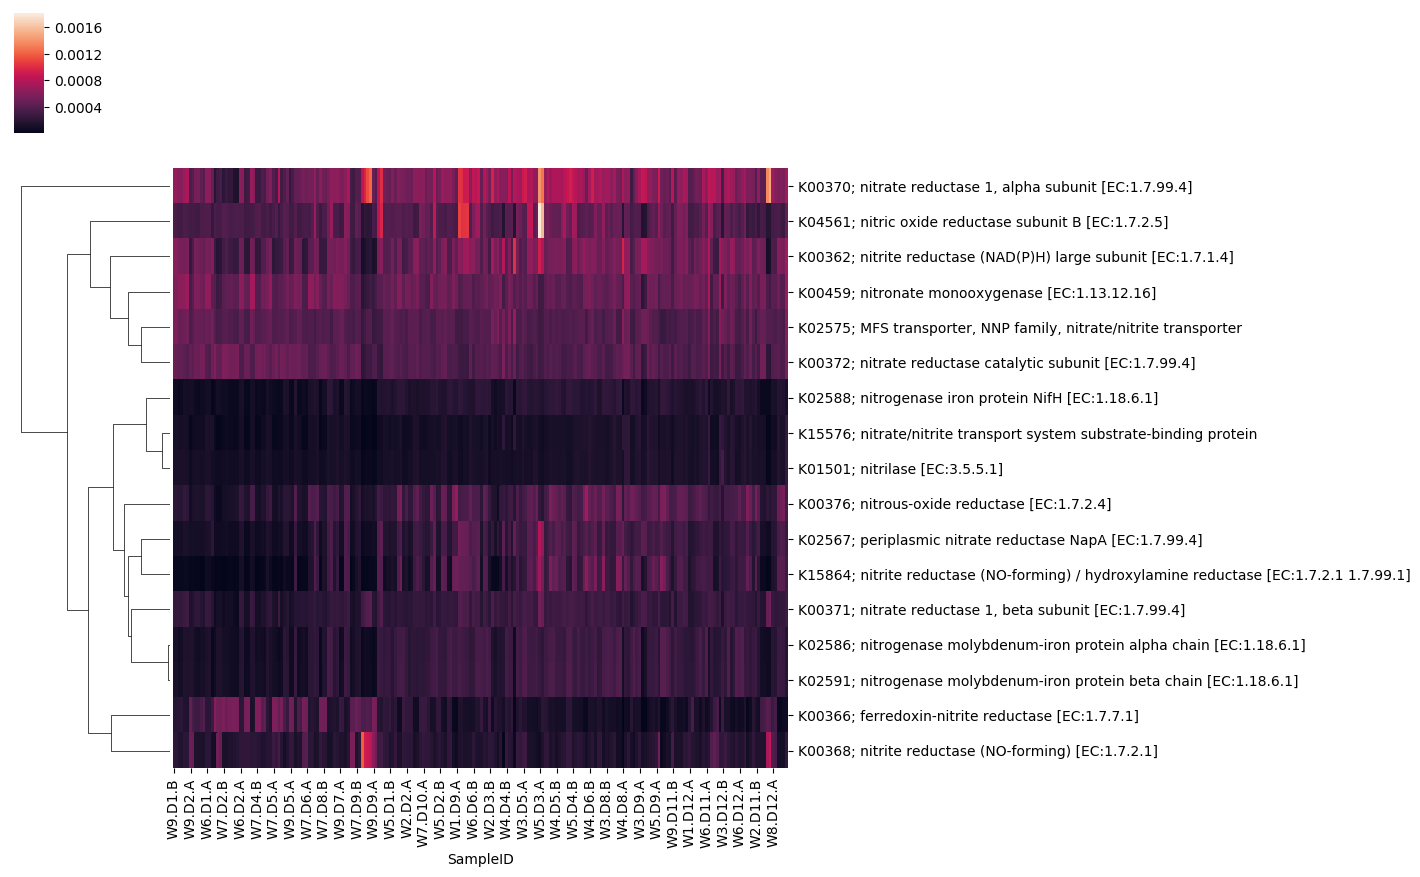

In [597]:
# Let's take a look at any trends in these pathways:
#nitrogen_pred_min_pct01 = nitrogen_pred[ nitrogen_pred.mean(axis=1) > .0001]
sns.clustermap(nitrogen_pred_subset, col_cluster=False)

In [485]:
nitrogen_pred.loc['K10944; ammonia monooxygenase subunit A [EC:1.14.99.39]'].mean()

4.4948248922522525e-05

Text(0.5,0,'Annual Inundation')

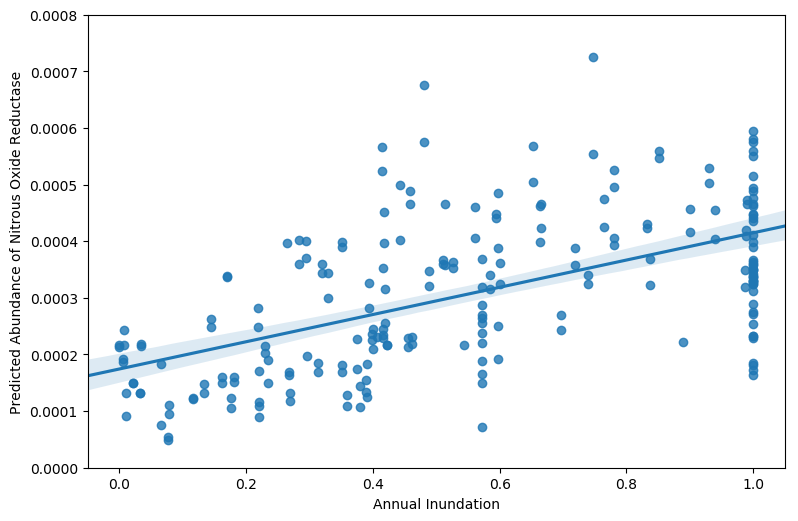

In [612]:
n2ored = nitrogen_pred[nitrogen_pred.index.str.contains(n2o_reductase)]
n2ored = n2ored[increasing_inundation]
f,ax = plt.subplots()
sns.regplot(map_df['inundation_fraction-year_average'].sort_values(), n2ored.iloc[0,:])
ax.set_ylim([0,.0008])
ax.set_ylabel('Predicted Abundance of Nitrous Oxide Reductase')
ax.set_xlabel('Annual Inundation')

In [599]:
n2o_reductase = 'K00376'
n2o_pred = nitrogen_pred_subset.loc[nitrogen_pred.index.str.contains(n2o_reductase)]

KeyError: IndexError('indices are out-of-bounds',)

In [591]:
nitrogen_pred_subset

SampleID,W9.D1.B,W9.D1.A,W8.D1.A,W8.D1.B,W10.D1.B,W10.D1.A,W9.D2.A,W9.D2.B,W8.D2.A,W8.D2.B,...,W8.D10.A,W8.D10.B,W8.D11.A,W8.D11.B,W8.D12.A,W8.D12.B,W4.D11.B,W4.D11.A,W4.D12.A,W5.D11.B
"K02575; MFS transporter, NNP family, nitrate/nitrite transporter",0.000578,0.000564,0.000493,0.000497,0.000517,0.000526,0.000367,0.000412,0.000485,0.000477,...,0.000474,0.000474,0.000390,0.000405,0.000381,0.000355,0.000409,0.000372,0.000349,0.000592
K15576; nitrate/nitrite transport system substrate-binding protein,0.000119,0.000118,0.000102,0.000105,0.000117,0.000107,0.000035,0.000069,0.000081,0.000086,...,0.000110,0.000106,0.000018,0.000023,0.000084,0.000080,0.000174,0.000125,0.000124,0.000249
K15578; nitrate/nitrite transport system ATP-binding protein [EC:3.6.3.-],0.000068,0.000067,0.000060,0.000063,0.000069,0.000065,0.000025,0.000043,0.000050,0.000053,...,0.000065,0.000062,0.000014,0.000015,0.000056,0.000054,0.000102,0.000078,0.000079,0.000130
"K00370; nitrate reductase 1, alpha subunit [EC:1.7.99.4]",0.000677,0.000678,0.000624,0.000622,0.000710,0.000774,0.000369,0.000404,0.000546,0.000559,...,0.000441,0.000426,0.001373,0.001503,0.000731,0.000616,0.000569,0.000601,0.000564,0.000715
"K00371; nitrate reductase 1, beta subunit [EC:1.7.99.4]",0.000263,0.000264,0.000253,0.000252,0.000283,0.000311,0.000138,0.000159,0.000222,0.000227,...,0.000176,0.000171,0.000477,0.000521,0.000268,0.000229,0.000243,0.000255,0.000248,0.000288
"K00374; nitrate reductase 1, gamma subunit [EC:1.7.99.4]",0.000098,0.000098,0.000102,0.000103,0.000109,0.000121,0.000041,0.000063,0.000090,0.000092,...,0.000070,0.000071,0.000065,0.000058,0.000060,0.000057,0.000076,0.000073,0.000066,0.000104
K00372; nitrate reductase catalytic subunit [EC:1.7.99.4],0.000496,0.000478,0.000454,0.000456,0.000431,0.000394,0.000456,0.000429,0.000498,0.000486,...,0.000533,0.000531,0.000222,0.000202,0.000379,0.000405,0.000439,0.000368,0.000362,0.000536
K02567; periplasmic nitrate reductase NapA [EC:1.7.99.4],0.000100,0.000100,0.000105,0.000106,0.000133,0.000125,0.000099,0.000109,0.000096,0.000099,...,0.000113,0.000102,0.000075,0.000078,0.000183,0.000188,0.000337,0.000383,0.000366,0.000258
K00362; nitrite reductase (NAD(P)H) large subunit [EC:1.7.1.4],0.000640,0.000622,0.000558,0.000550,0.000540,0.000575,0.000252,0.000363,0.000552,0.000524,...,0.000529,0.000505,0.000106,0.000136,0.000373,0.000352,0.000626,0.000591,0.000554,0.000732
K00363; nitrite reductase (NAD(P)H) small subunit [EC:1.7.1.4],0.000097,0.000097,0.000085,0.000087,0.000079,0.000083,0.000089,0.000081,0.000098,0.000094,...,0.000100,0.000102,0.000095,0.000099,0.000088,0.000088,0.000071,0.000064,0.000062,0.000093


In [634]:
import glob

In [638]:
files = glob.glob('/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/*/*')
len(files)

146

In [639]:
files[-1]

'/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Paul9_RC_2_02_14_17-59607595/Paul9-RC-2-02-14-17_S189_L001_R2_001.fastq.gz'

In [640]:
files[:10]

['/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim125_RS3_10_1_16-42981568/Jim125-RS3-10-1-16_S125_L001_R1_001.fastq.gz',
 '/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim125_RS3_10_1_16-42981568/Jim125-RS3-10-1-16_S125_L001_R2_001.fastq.gz',
 '/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim125_RS3_10_1_16-42981568/test.fq',
 '/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim125_RS3_10_1_16-42981568/test2.fq',
 '/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim126_RS3_10_20_16-43000095/Jim126-RS3-10-20-16_S126_L001_R1_001.fastq.gz',
 '/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim126_RS3_10_20_16-43000095/Jim126-RS3-10-20-16_S126_L001_R2_001.fastq.gz',
 '/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim151_RS2_10_20_16-42981570/Jim151-RS2-10-20-16_S151_L001_R1_001.fastq.gz',
 '/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim151_RS2_10_20_16-42981570/Jim151-RS2-10-20-16_S151_L001_R2_001.fastq.gz',
 '/Users/jimbo/Desktop/SCBNR_16S_DADA2/raw/Jim152_RS2_11_1_16-43005110/Jim152-RS2-11-1-16_S152_L001_R1_001.fastq.gz',
 '/